**Tsalisa - 0706022210055**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

## Load Dataset

In [33]:
url_bank = r'https://raw.githubusercontent.com/tsalisacamila/Data-Mining/refs/heads/main/bank.csv'
df_bank = pd.read_csv(url_bank, delimiter=';')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [34]:
df_info = df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [35]:
unknown_counts = (df_bank == 'unknown').sum()

In [36]:
df_info, unknown_counts[unknown_counts > 0]

(None,
 job            38
 education     187
 contact      1324
 poutcome     3705
 dtype: int64)

In [37]:
df_cleaned = df_bank.replace('unknown', pd.NA).dropna()

In [38]:
cleaned_info = df_cleaned.info()
cleaned_info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 1 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        764 non-null    int64 
 1   job        764 non-null    object
 2   marital    764 non-null    object
 3   education  764 non-null    object
 4   default    764 non-null    object
 5   balance    764 non-null    int64 
 6   housing    764 non-null    object
 7   loan       764 non-null    object
 8   contact    764 non-null    object
 9   day        764 non-null    int64 
 10  month      764 non-null    object
 11  duration   764 non-null    int64 
 12  campaign   764 non-null    int64 
 13  pdays      764 non-null    int64 
 14  previous   764 non-null    int64 
 15  poutcome   764 non-null    object
 16  y          764 non-null    object
dtypes: int64(7), object(10)
memory usage: 107.4+ KB


In [39]:
le = LabelEncoder()
for col in df_cleaned.select_dtypes(include='object').columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

## Machine Learning

In [40]:
X = df_cleaned.drop('y', axis=1)
y = df_cleaned['y']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape, X_test.shape

((611, 16), (153, 16))

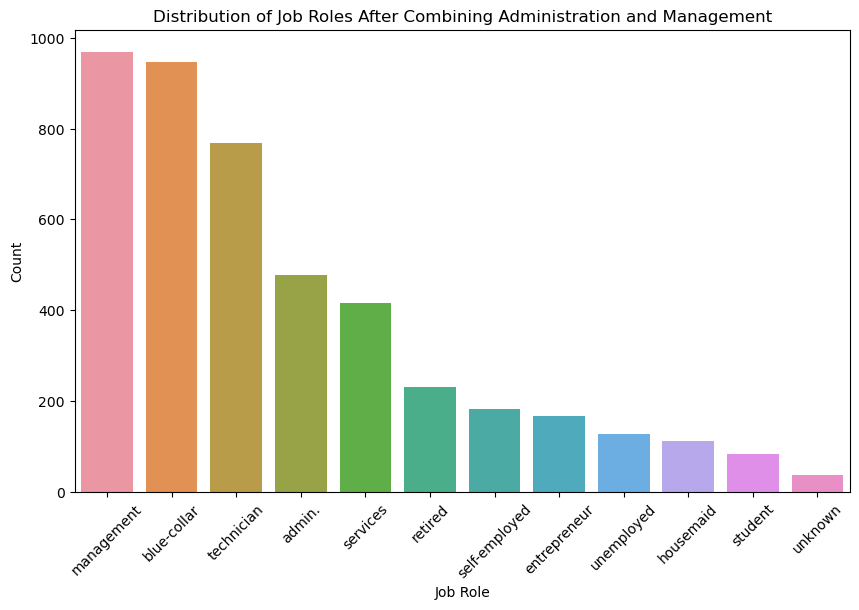

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_bank, x='job', order=df_bank['job'].value_counts().index)
plt.title('Distribution of Job Roles After Combining Administration and Management')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

1. Bar Plot -> Ini membantu melihat komposisi setiap jenis pekerjaan, memberikan gambaran tentang latar belakang pekerjaan dari klien yang ada dalam dataset.

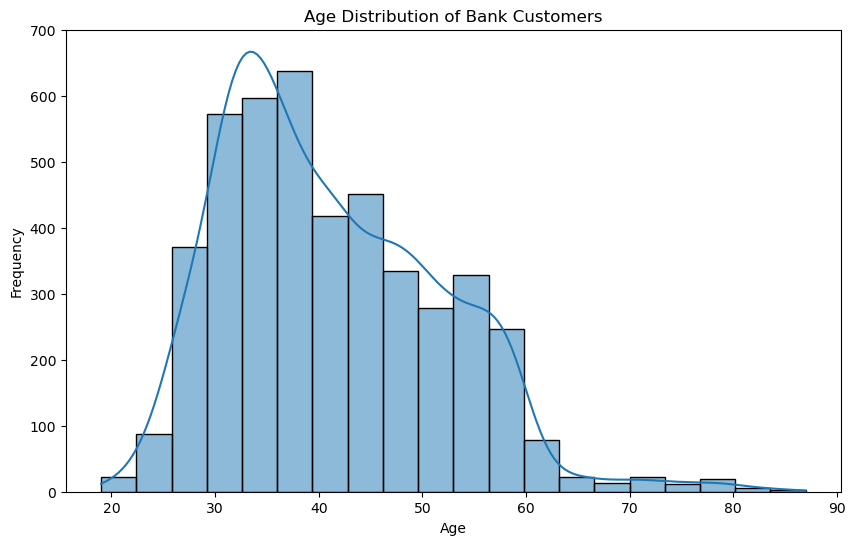

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df_bank['age'], bins=20, kde=True)
plt.title('Age Distribution of Bank Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

2. Histrogram -> ini bermanfaat bagi pihak bank untuk memahami karakteristik demografis nasabah berdasarkan usia, membantu menyusun strategi pemasaran yang sesuai dengan kelompok usia tertentu.

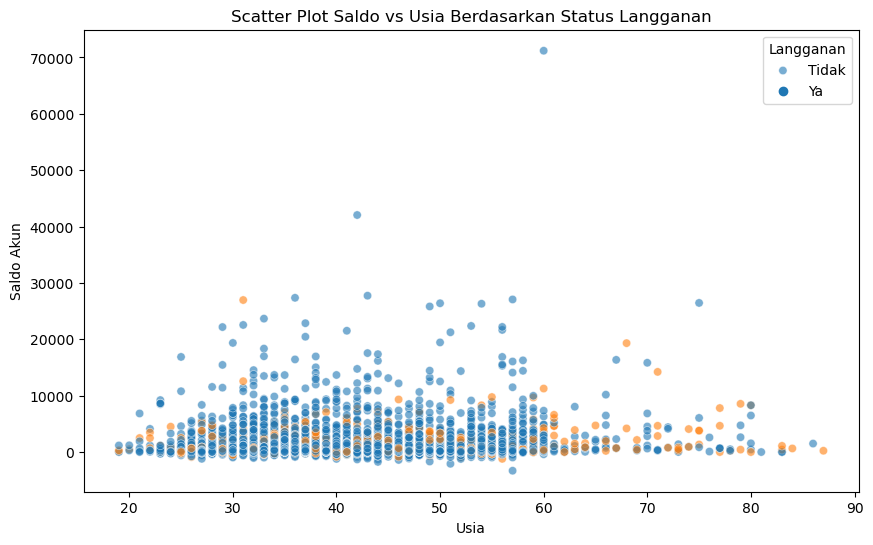

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_bank, x="age", y="balance", hue="y", alpha=0.6)
plt.title("Scatter Plot Saldo vs Usia Berdasarkan Status Langganan")
plt.xlabel("Usia")
plt.ylabel("Saldo Akun")
plt.legend(title="Langganan", labels=["Tidak", "Ya"])
plt.show()



Scatter Plot -> ini menunjukkan hubungan antara saldo akun dan usia berdasarkan status langganan. Titik-titik tersebar mewakili klien, dengan warna yang menunjukkan apakah mereka berlangganan atau tidak. Dari grafik ini, Anda dapat mengamati apakah terdapat kecenderungan tertentu antara saldo dan usia dalam kaitannya dengan langganan. Jika kelompok tertentu lebih terkonsentrasi, ini dapat memberikan wawasan tambahan untuk menentukan strategi pemasaran yang sesuai.

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [47]:
#a
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Anda dapat menyesuaikan n_estimators
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [48]:
#b
y_pred_rf = rf_model.predict(X_test)

In [49]:
#c
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy Score:", rf_accuracy)

Accuracy Score: 0.7908496732026143


In [50]:
#d
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", rf_conf_matrix)

Confusion Matrix:
 [[108   7]
 [ 25  13]]


In [51]:
#e
rf_class_report = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", rf_class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       115
           1       0.65      0.34      0.45        38

    accuracy                           0.79       153
   macro avg       0.73      0.64      0.66       153
weighted avg       0.77      0.79      0.77       153



<Figure size 1000x500 with 0 Axes>

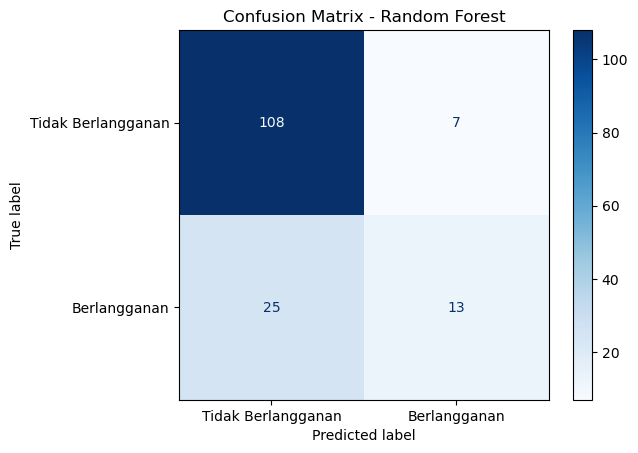

In [52]:
plt.figure(figsize=(10, 5))
disp_rf = ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, display_labels=["Tidak Berlangganan", "Berlangganan"], cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

f. Secara keseluruhan model Random Forest memiliki akurasi yang baik,  namun ada kekurangan dalam mengenali klien yang berlangganan. Perlu dilakukan tuning hyperparameter atau eksplorasi model lain untuk meningkatkan prediksi pada kelas berlangganan

## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [53]:
#a
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [54]:
#b
y_pred_gb = gb_model.predict(X_test)

In [55]:
#c
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Accuracy Score:", gb_accuracy)

Accuracy Score: 0.8169934640522876


In [56]:
#d
gb_conf_matrix = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:\n", gb_conf_matrix)

Confusion Matrix:
 [[110   5]
 [ 23  15]]


In [57]:
#e
gb_class_report = classification_report(y_test, y_pred_gb)
print("Classification Report:\n", gb_class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       115
           1       0.75      0.39      0.52        38

    accuracy                           0.82       153
   macro avg       0.79      0.68      0.70       153
weighted avg       0.81      0.82      0.80       153



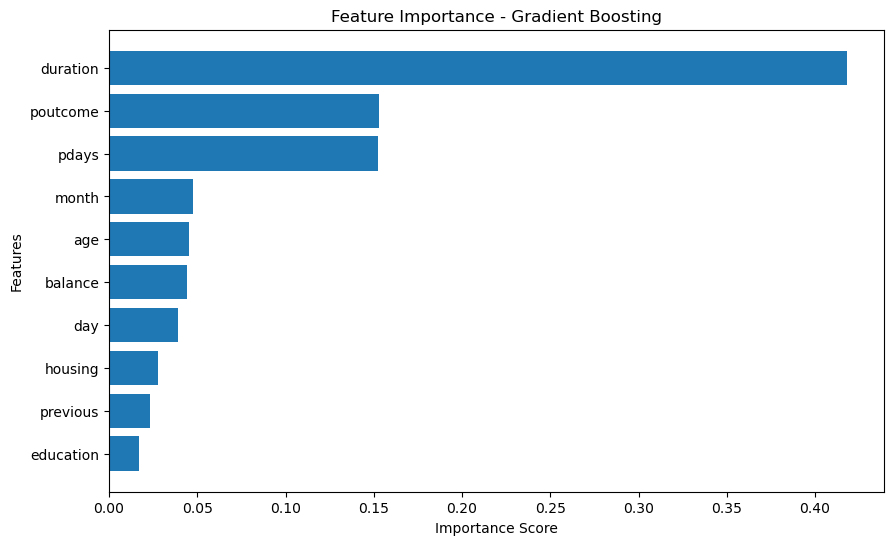

In [58]:
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices_gb][:10], importances_gb[indices_gb][:10])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

f. model Gradient Boosting menunjukkan bahwa faktor seperti durasi interaksi, frekuensi kontak, dan kondisi keuangan sangat memengaruhi keputusan langganan. Informasi ini dapat membantu dalam mengembangkan strategi pemasaran yang lebih terfokus, dengan memperhatikan klien yang memiliki kemungkinan lebih tinggi untuk berlangganan berdasarkan durasi interaksi dan status finansial mereka.